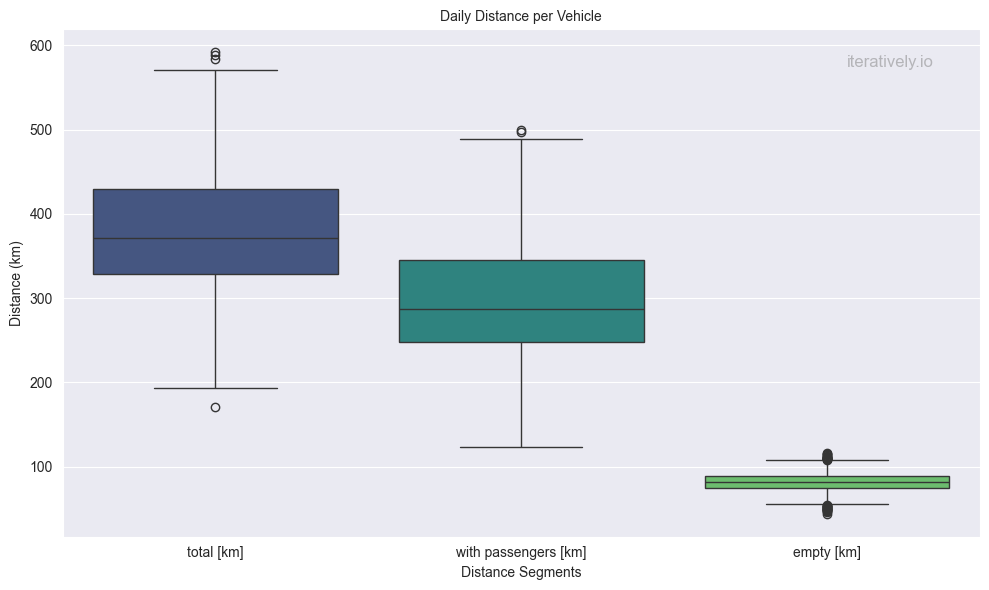

In [2]:
# If you would like to replicate this notebook.
# You need to run the simulation and adapt your output path of the simulation result

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os

sns.set_style("darkgrid")
vehicles_distance_stats_path = os.path.abspath(os.path.join(os.getcwd(), "..", "..","..","..","..","outputs","chicago","output","0d95c633-2c12-4b99-bdf9-22b005e281c2","output_vehicleDistanceStats_drt.csv"))
vehicles_distance_stats = pd.read_csv(vehicles_distance_stats_path,sep = ";")

# Select relevant columns and convert meters to kilometers, then divide by 7
distance_columns = ['drivenDistance_m', 'occupiedDistance_m', 'emptyDistance_m']
df_km = vehicles_distance_stats[distance_columns] / 1000 / 7

# Rename columns for plot labels
df_km.columns = ['total [km]', 'with passengers [km]', 'empty [km]']

# Convert to long format for seaborn
df_long = df_km.melt(var_name='Distance Segments', value_name='Distance')

# Create boxplot with seaborn
plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    data=df_long,
    x='Distance Segments',
    y='Distance',
    hue='Distance Segments',
    palette='viridis',
    legend=False
)


# Set titles and labels
ax.set_title('Daily Distance per Vehicle', fontsize=10)
ax.set_ylabel('Distance (km)', fontsize=10)
ax.tick_params(axis='both', labelsize=10)

# Add watermark
ax.text(0.95, 0.95, 'iteratively.io', fontsize=12, color='gray', ha='right', va='top', alpha=0.5, transform=ax.transAxes)

# Save the plot
plt.tight_layout()
plt.savefig("daily_distance_km.png")

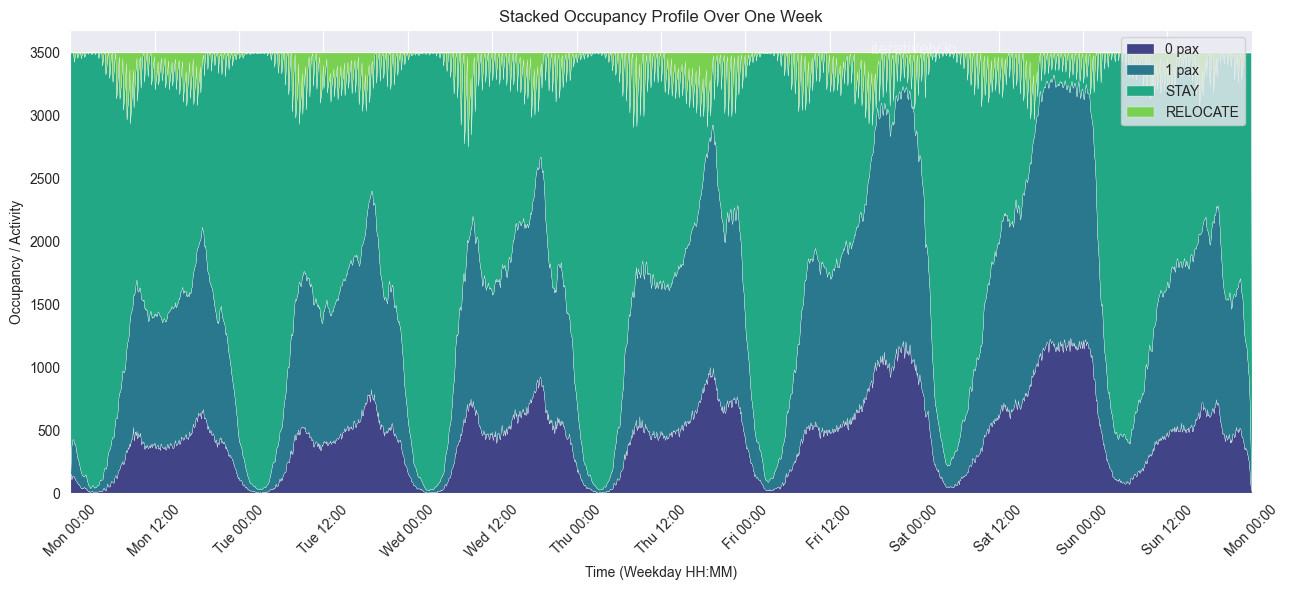

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import os
import locale
locale.setlocale(locale.LC_TIME, 'en_US.UTF-8') # English lables


sns.set_style("darkgrid")
fleetPath = os.path.abspath(os.path.join(os.getcwd(), "..", "..","..","..","outputs","chicago","output","0d95c633-2c12-4b99-bdf9-22b005e281c2","ITERS","it.2","2.occupancy_time_profiles_drt.txt"))
fleet = pd.read_csv(fleetPath,sep = ";")


start = pd.Timestamp('2025-06-02 00:00:00')
fleet['datetime'] = pd.to_timedelta(fleet['time']) + start


# Define categories and colors
categories = ['0 pax', '1 pax', 'STAY', 'RELOCATE']
viridis = sns.color_palette("viridis", n_colors=len(categories))
stack_data = [fleet[cat] for cat in categories]

# Plot
plt.figure(figsize=(13, 6))
plt.stackplot(fleet['datetime'], stack_data, labels=categories, colors=viridis, linewidth=0.2)
plt.xlabel('Time (Weekday HH:MM)')
plt.ylabel('Occupancy / Activity')
plt.title('Stacked Occupancy Profile Over One Week')
plt.legend(loc='upper right')
plt.text(0.97, 0.90, 'iteratively.io', fontsize=12, color='white', ha='right', va='center', transform=ax.transAxes, alpha=0.5)
plt.grid(True)


# Set start and end of x-axis manually
ax = plt.gca()
start = fleet['datetime'].min()
end = fleet['datetime'].max()
ax.set_xlim([start, end])

# Format ticks
ax.xaxis.set_major_formatter(mdates.DateFormatter('%a %H:%M'))
ax.xaxis.set_major_locator(mdates.HourLocator(interval=12))

plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig("occupancy_stackplot_weekday_time.png")
plt.show()

